In [2]:
import pandas as pd 
import numpy as np 


In [3]:
df = pd.read_csv("winequality-red.csv")
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

<Axes: >

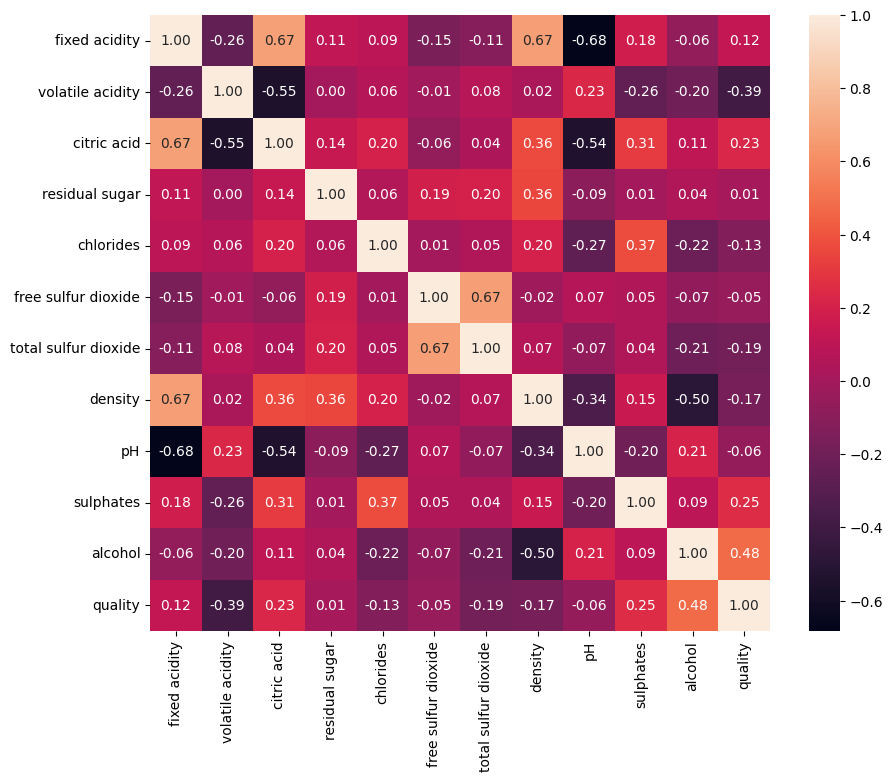

In [5]:
import seaborn as sns 
import matplotlib.pyplot as plt 


plt.figure(figsize=(10 , 8 ))
sns.heatmap(df.select_dtypes(include='number').corr() , annot=True , fmt=".2f")


In [7]:
X = df[["chlorides", "total sulfur dioxide", "free sulfur dioxide", "pH" , 'alcohol' , "volatile acidity" , "citric acid" , "sulphates" , "fixed acidity" , 'density']]

y = df['quality']


In [11]:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3])

In [9]:
from sklearn.model_selection import train_test_split


X_train , X_test , y_train , y_test = train_test_split(X , y , random_state=42 , test_size=0.3)




In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
from sklearn.ensemble import RandomForestRegressor
import warnings 
warnings.filterwarnings('ignore')


from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "n_estimators": [100, 200, 500],
    "max_depth": [5, 10, 15, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 3, 5, 10],
    "max_features": ["auto", "sqrt", "log2"]
}

search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_dist,
    n_iter=20,
    cv=5,
    scoring="r2",
    n_jobs=-1,
    random_state=42
)

search.fit(X_train, y_train)
print("Best Params:", search.best_params_)
print("Best R²:", search.best_score_)



Best Params: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}
Best R²: 0.4347885746203681


In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")


MSE: 0.3652
RMSE: 0.6043
MAE: 0.4694
R²: 0.4239


In [18]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

from sklearn.metrics import r2_score
print("XGB R²:", r2_score(y_test, y_pred))


XGB R²: 0.4437336325645447
